<a href="https://colab.research.google.com/github/kyungrae2002/AI_1/blob/main/Colab_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
fish_full = pd.read_csv('https://bit.ly/perch_csv_data')
fish_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [46]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [47]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_full, perch_weight, random_state = 42)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [54]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(test_poly, test_target))

0.9714559911594111


In [57]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [59]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [62]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


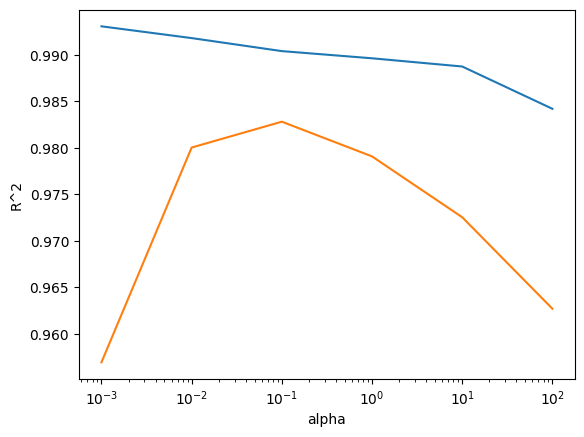

In [65]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001 ,0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [66]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [67]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

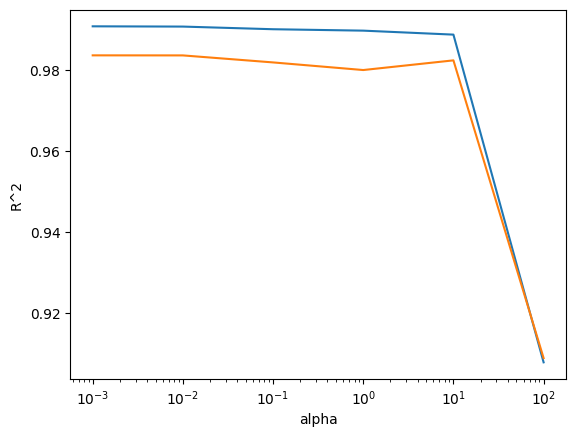

In [69]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1 , 1 ,10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
import matplotlib.pyplot as plt
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


In [71]:
lasso= Lasso(10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [72]:
print(np.sum(lasso.coef_ == 0))

40


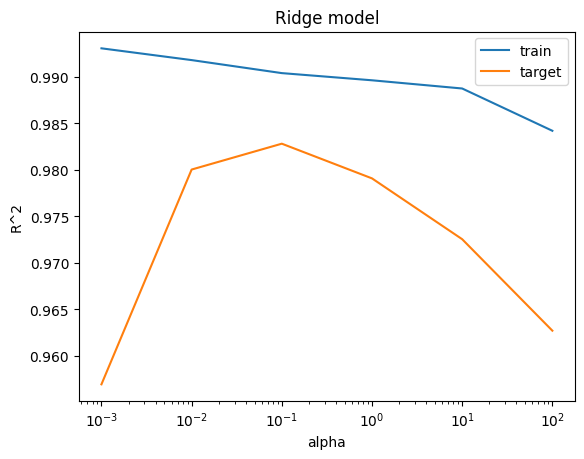

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

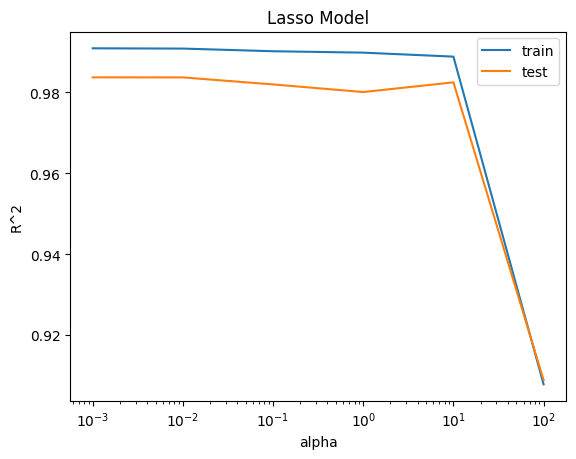

라소 훈련 모델 확률 : 0.9888067471131867
라소 테스트 모델 확률 0.9824470598706695
릿지 훈련 모델 확률 : 0.9903815817570367
릿지 테스트 모델 확률 : 0.9827976465386928


In [101]:
import pandas as pd
fish_full = pd.read_csv('https://bit.ly/perch_csv_data')

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_full, perch_weight, random_state = 42)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5 , include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

from sklearn.linear_model import Ridge
train_score = []
target_score = []
alpha_list = [0.001, 0.01, 0.1 , 1 ,10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha= alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  target_score.append(ridge.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(alpha_list, train_score, label = 'train')
plt.plot(alpha_list, target_score, label = 'target')
plt.xscale('log')
plt.title('Ridge model')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show() # 0.1에서 최대 발생

from sklearn.linear_model import Lasso
train_score = []
target_score= []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  target_score.append(lasso.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.title("Lasso Model")
plt.plot(alpha_list, train_score, label = 'train')
plt.plot(alpha_list, target_score, label = 'test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show() # 10에서 최대 발생

#최대 최소를 찾았으니 이제 각각의 최대 알파로 확률 출력

lasso_id= Lasso(alpha = 10)
lasso_id.fit(train_scaled, train_target)

print(f"라소 훈련 모델 확률 : {lasso_id.score(train_scaled, train_target)}")
print(f"라소 테스트 모델 확률 {lasso_id.score(test_scaled, test_target)}")

ridge_id = Ridge(alpha = 0.1)
ridge_id.fit(train_scaled, train_target)

print(f"릿지 훈련 모델 확률 : {ridge_id.score(train_scaled, train_target)}")
print(f"릿지 테스트 모델 확률 : {ridge_id.score(test_scaled, test_target)}")